Импортируем необходимые библиотек

In [ ]:
from keras.datasets import mnist
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense, BatchNormalization
import keras
from keras.utils.np_utils import to_categorical

Подгрузим данные из стандартных датасетов из keras.

Датасет называется MNIST и представляет из себя черно-белые изображения 28 на 28 пикселей.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, X_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

Отображаем первые 5 изображений

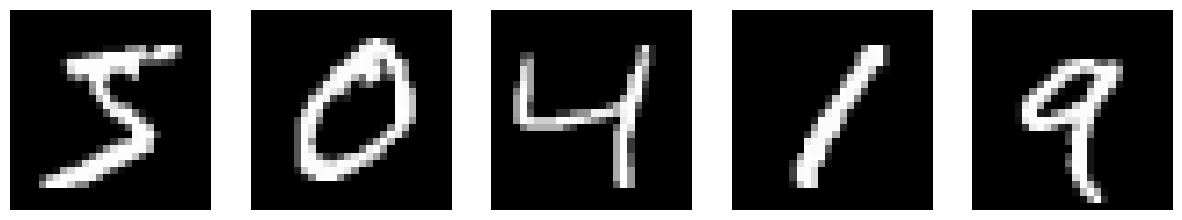

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
  ax[i].imshow(X_train[i], cmap='gray')
  ax[i].axis('off')

Выводим первые 5 меток классов

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Преобразуем размеры и нормализуем данные

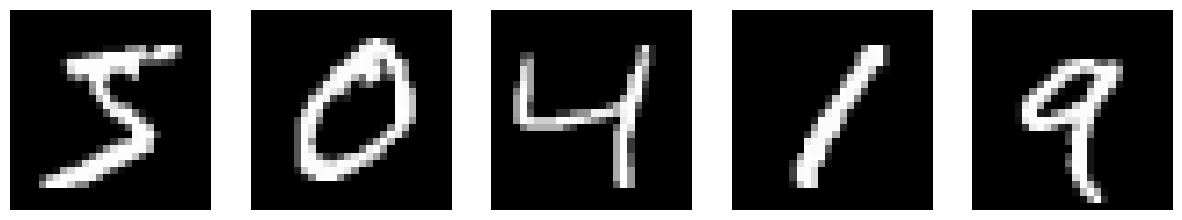

In [ ]:
X_train_resize = X_train[..., np.newaxis][..., 0]
X_test_resize = X_test[..., np.newaxis][..., 0]

In [ ]:
X_train_resize = np.array(X_train_resize)

In [ ]:
X_train_resize = X_train_resize / 255

Преобразуем метки классов в one-hot кодирование

In [ ]:
y_train = to_categorical(y_train)

In [ ]:
X_train_resize.shape

(60000, 28, 28)

Построение модели нейронной сети

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(512, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(512, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))

Компилируем модель с оптимизатором и функцией потерь

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

Выводим структуру модели

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 10)                5

Отображаем графическое представление модели

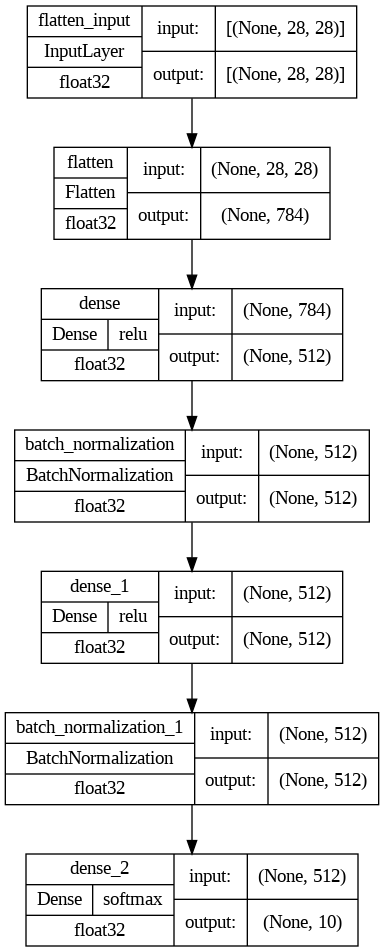

In [ ]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

Обучение модели на тренировочных данных

In [ ]:
history = model.fit(X_train_resize, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2055 - accuracy: 0.9373
Epoch 2/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1076 - accuracy: 0.9662
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0839 - accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0694 - accuracy: 0.9781
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0561 - accuracy: 0.9819
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0525 - accuracy: 0.9831
Epoch 7/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0426 - accuracy: 0.9862
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0375 - accuracy: 0.9879
Epoch 9/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0338 - accuracy: 0.9887
Epoch 10/10
1875/1875 [==============================] - 23s 12m

Создаем датафрейм с историей обучения и отображаем графики

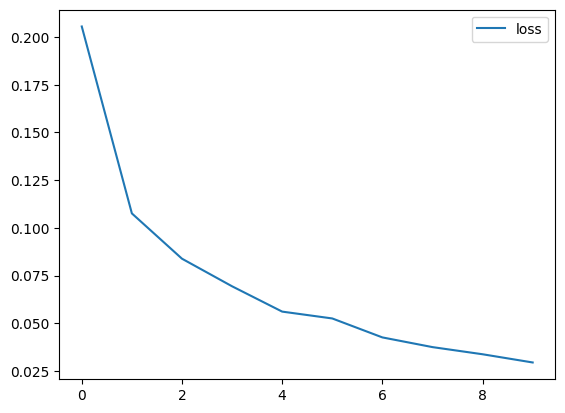

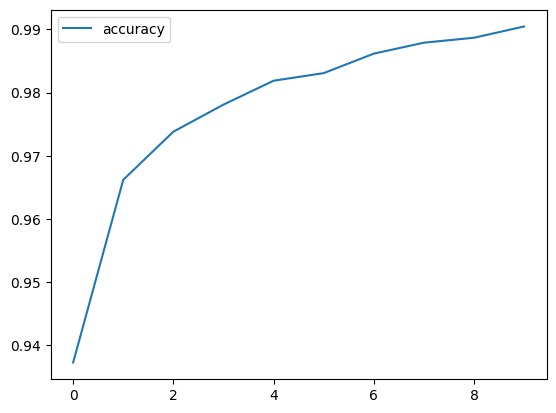

In [ ]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot()
history_df.loc[:, ['accuracy']].plot()
plt.show()

Выбираем случайное изображение для тестирования и предсказываем класс изображения с помощью модели

1/1 [==============================] - 0s 39ms/step


(1, 1)

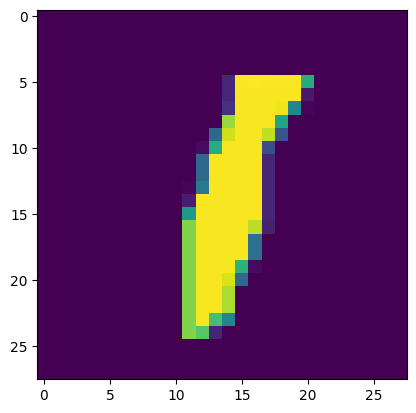

In [ ]:
index = 1240
x = np.expand_dims(X_test_resize[index], axis=0)
plt.imshow(X_test_resize[index])
res = model.predict(x)
res.argmax(), y_test[index]

Проверим на 1000 данных какой процент правильных распознаний

In [ ]:
count = 0
for i in range(1000):
  x = np.expand_dims(X_test_resize[i], axis=0)
  preds = model.predict(x)
  if y_test[i] == preds.argmax():
    count += 1

In [ ]:
(count/1000) * 100

87.6

Сохраняем содель с расширением h5, тк это формат файлов, используемый для сохранения моделей глубокого обучения, созданных с использованием библиотеки Keras.

In [ ]:
model.save('model.h5')